<b>Import Libraries</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings("ignore")

<b>Import Dataset</b>

In [2]:
heart_dataset = pd.read_csv("heart_disease.csv")

<b>Exploratory Data Analysis (EDA) and Statistical Analysis</b>

In [3]:
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V.
COLUMNS:
age
sex = 1: male; 0: female
cp = chest pain type
trestbps = resting blood pressure (in mm Hg on admission to the hospital)
chol = serum cholestoral in mg/dl
fbs = fasting blood sugar > 120 mg/dl, 1: true; 0: false
restecg = resting electrocardiographic results
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach = maximum heart rate achieved
exang = exercise induced angina, 1:yes; 0: no
oldpeak = ST depression induced by exercise relative to rest
slope = the slope of the peak exercise ST segment
Value 1: upsloping
Value 2: flat
Value 3: downsloping
ca = number of major vessels (0-3) colored by flourosopy
thal = 0: normal; 1: fixed defect; 2: reversable defect

In [4]:
heart_dataset.shape

(303, 14)

In [5]:
heart_dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<b>Missing Value Treatment</b>

In [7]:
heart_dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

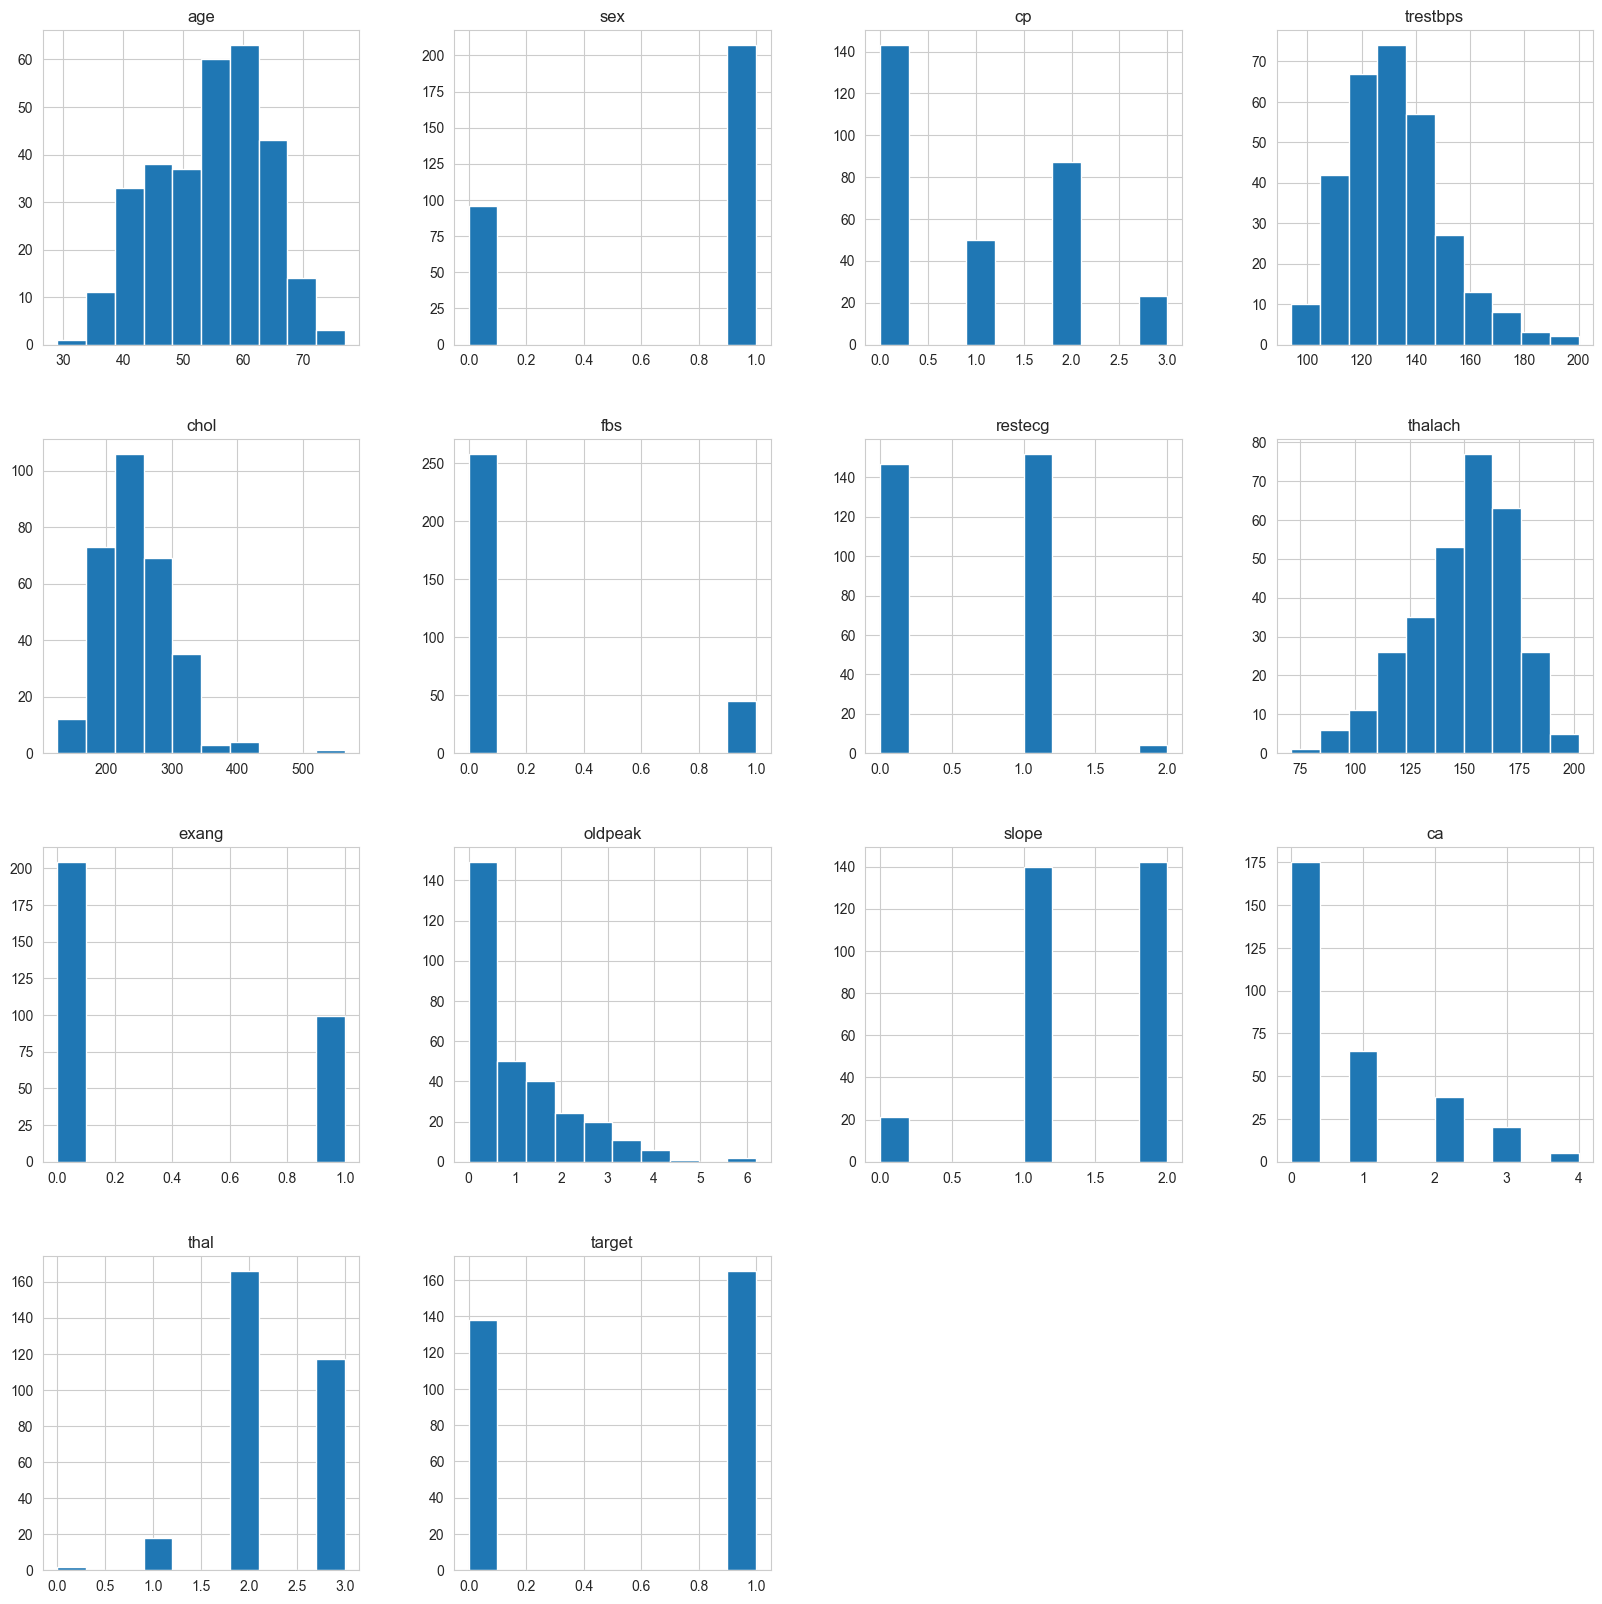

In [8]:
heart_dataset.hist(figsize=(20,20))
plt.show()

<b>Feature Observation</b>

In [9]:
heart_dataset.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


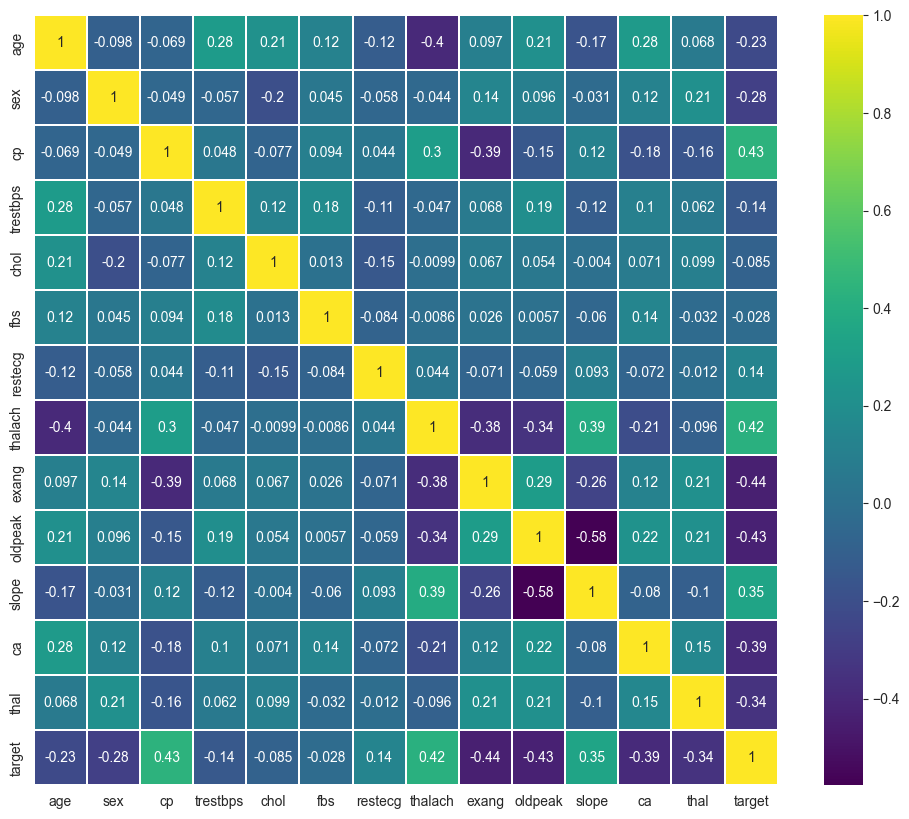

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(heart_dataset.corr(), annot=True, cmap='viridis', linewidths=0.1)
plt.show()

In [11]:
heart_dataset.corr()['target'].sort_values()

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
target      1.000000
Name: target, dtype: float64

<b>Checking Balance of Data</b>

In [12]:
heart_dataset['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

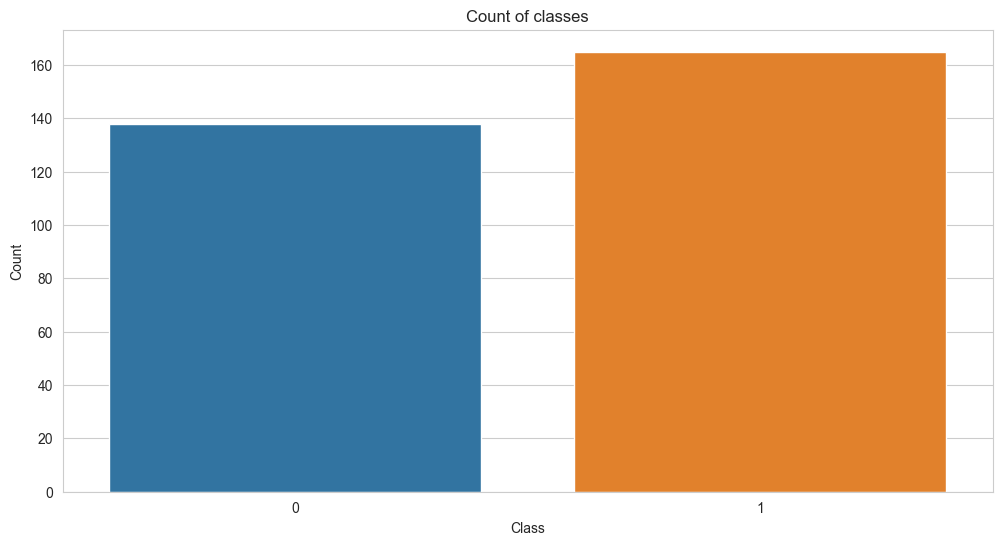

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(x='target', data=heart_dataset)
plt.title("Count of classes")
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [14]:
heart_dataset.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


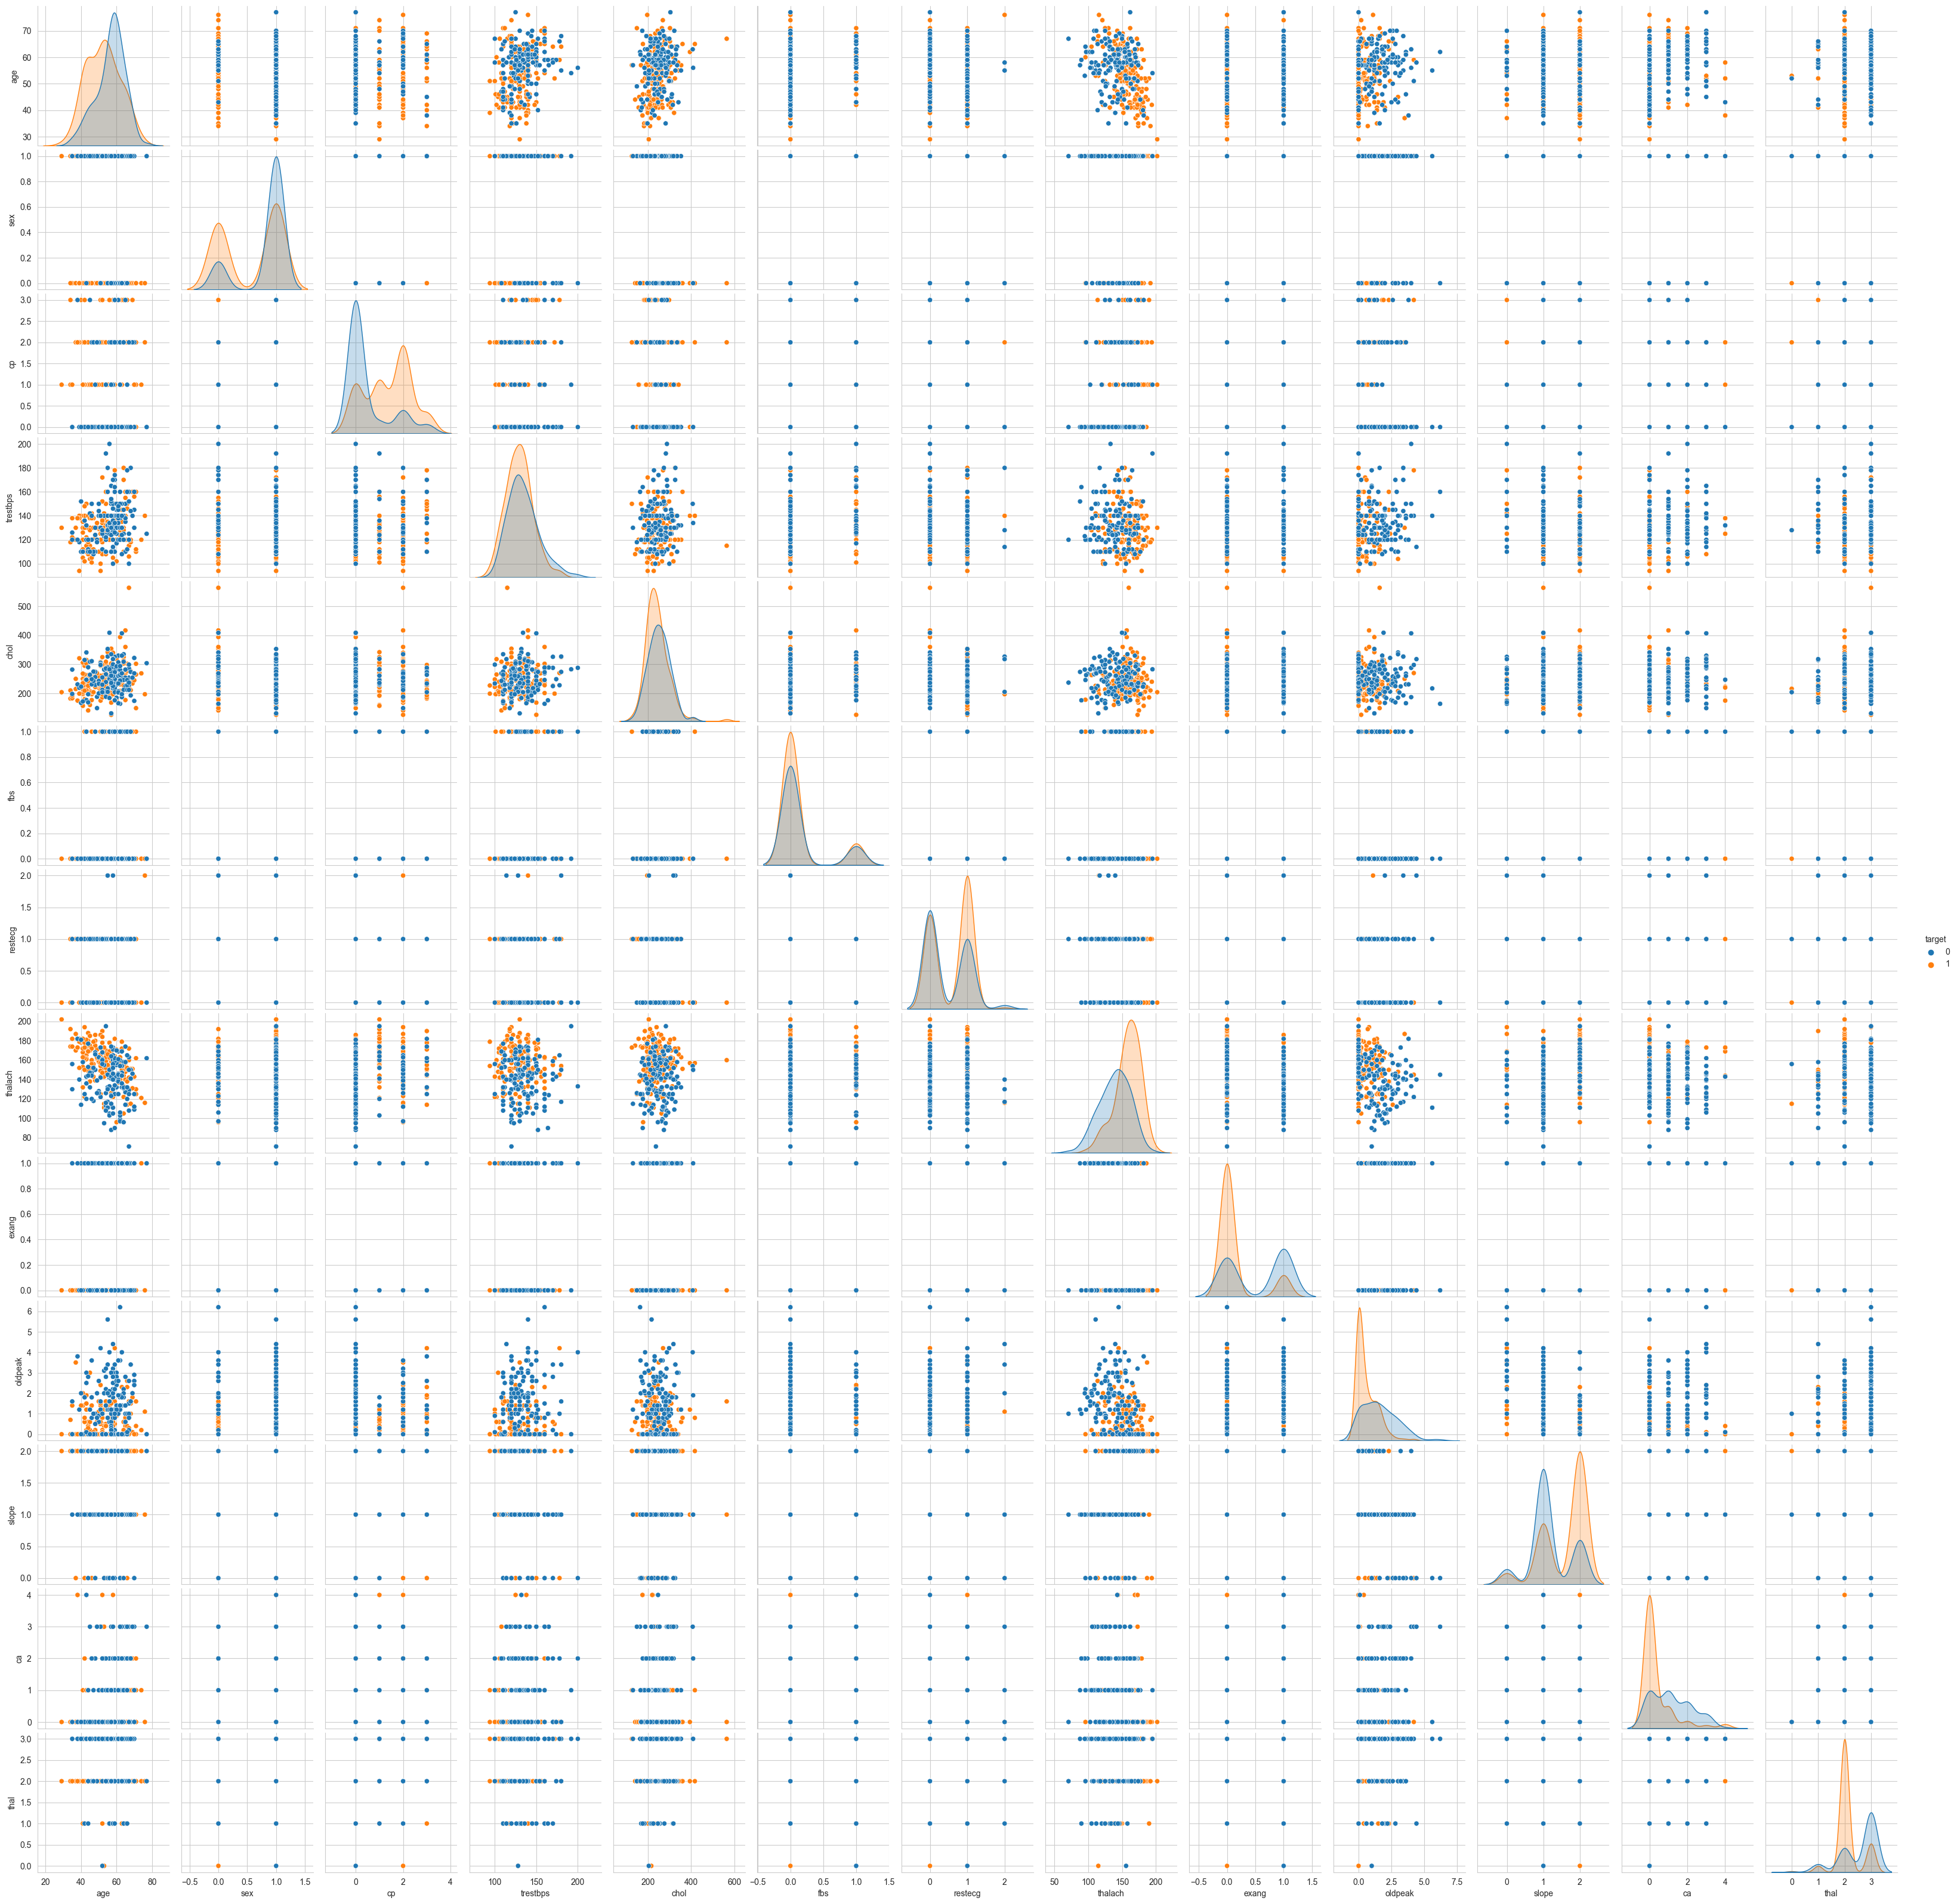

In [15]:
sns.pairplot(heart_dataset, hue='target')
plt.show()

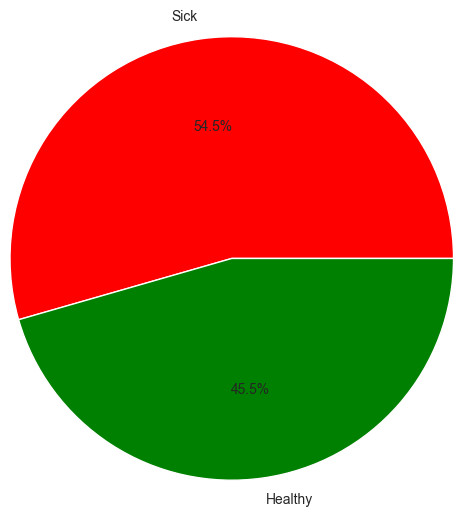

In [16]:
plt.pie(heart_dataset['target'].value_counts(), labels=['Sick','Healthy'], colors=['red','green'], autopct='%1.1f%%', radius=1.5)
plt.show()

Kita dapat melihat bahwa setengah dari orang-orang dalam penelitian ini memiliki penyakit jantung.

<b>A. Age and sex</b>

<AxesSubplot:xlabel='age', ylabel='Count'>

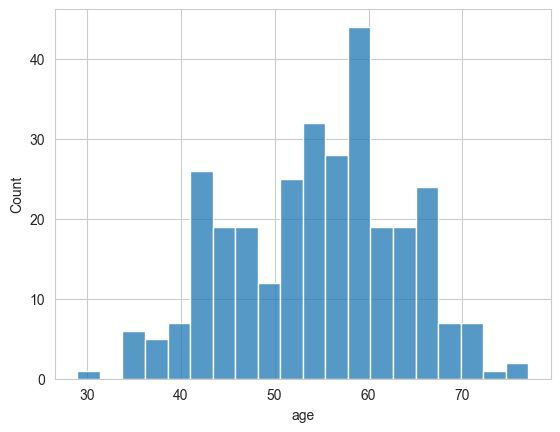

In [17]:
sns.histplot(heart_dataset['age'], bins= 20)

Kita dapat melihat bahwa sebagian besar orang dalam penelitian ini berusia 50-60 tahun.

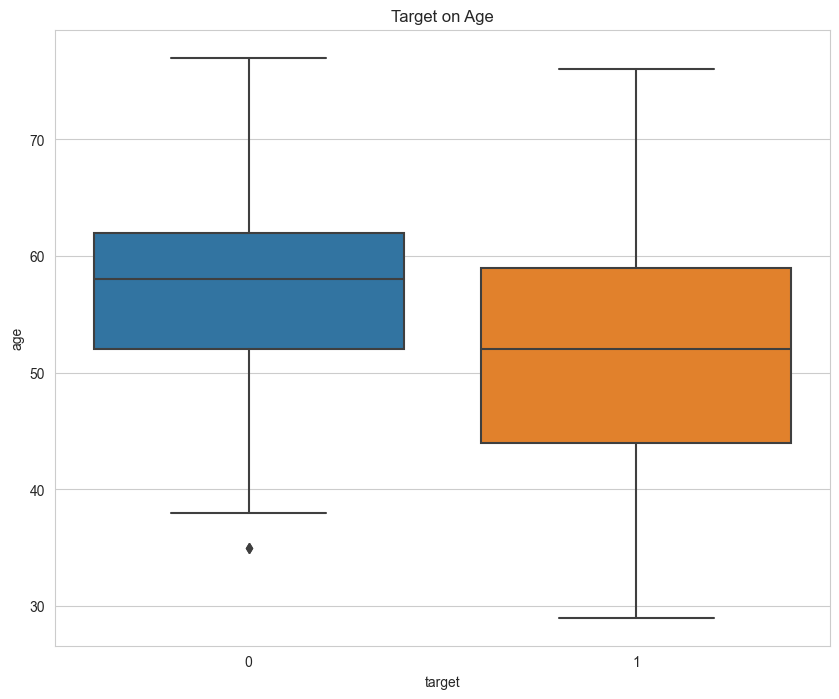

In [18]:
plt.figure(figsize=(10,8))
sns.boxplot(data=heart_dataset, x='target', y='age')
plt.title('Target on Age')
plt.show()

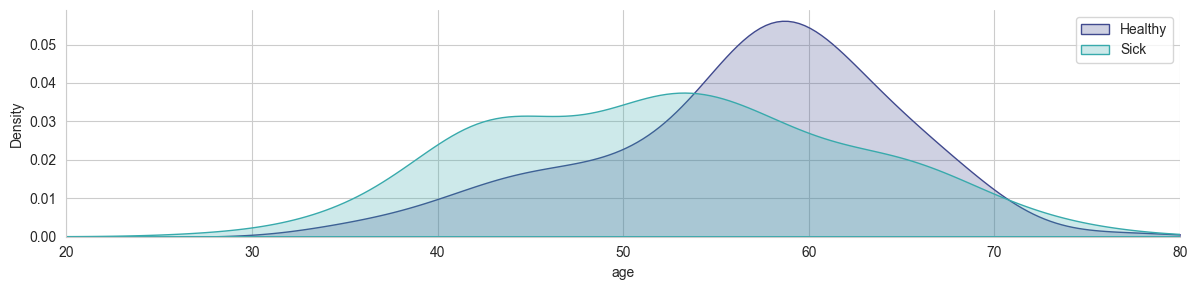

In [19]:
fig = sns.FacetGrid(heart_dataset, hue="target",aspect=4, palette='mako')
fig.map(sns.kdeplot,'age', shade=True)
fig.set(xlim=(20,80))
plt.legend(labels=['Healthy', 'Sick'])

Kita dapat melihat bahwa sebagian besar orang menunjukkan penyakit jantung mereka antara usia 40-60. Juga, kita melihat puncak kurva orang sehat pada usia 60.

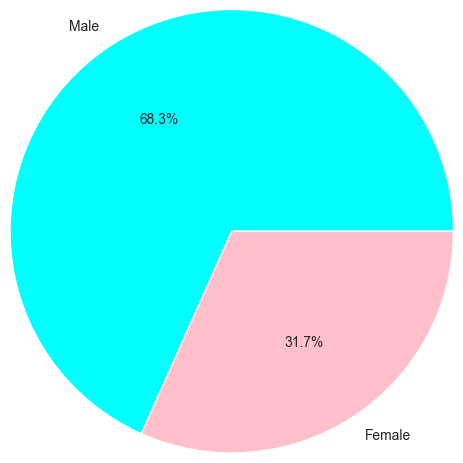

In [20]:
plt.pie(heart_dataset['sex'].value_counts(), labels=['Male','Female'], colors=['cyan','pink'], autopct='%1.1f%%', radius=1.5)
plt.show()

Kita dapat melihat bahwa 30% orang adalah perempuan dan 70% adalah laki-laki.

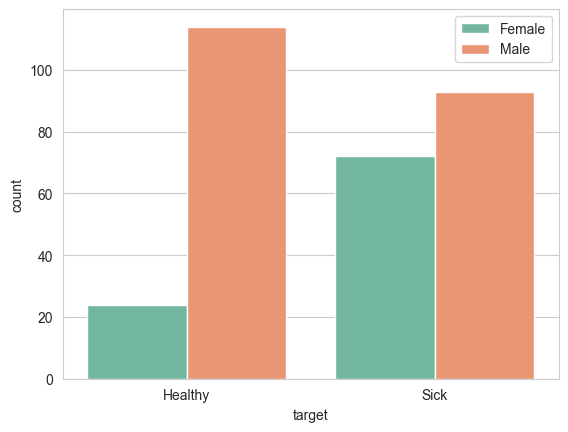

In [21]:
fig = sns.countplot(x = 'target', data=heart_dataset, hue='sex', palette='Set2')
fig.set_xticklabels(labels=['Healthy', 'Sick'])
plt.legend(['Female', 'Male'])

Kita dapat melihat bahwa laki-laki lebih banyak dalam penelitian ini, sehingga laki-laki sehat dan sakit lebih banyak daripada perempuan.

<Figure size 1000x800 with 0 Axes>

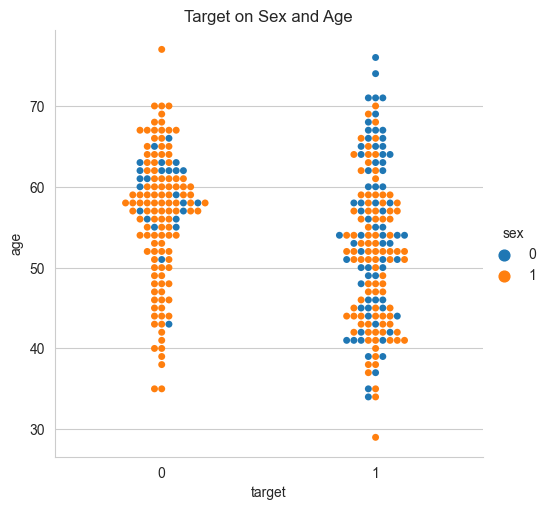

In [22]:
plt.figure(figsize=(10,8))
sns.catplot(data=heart_dataset, x='target', y='age', hue='sex', kind='swarm')
plt.title('Target on Sex and Age')
plt.show()

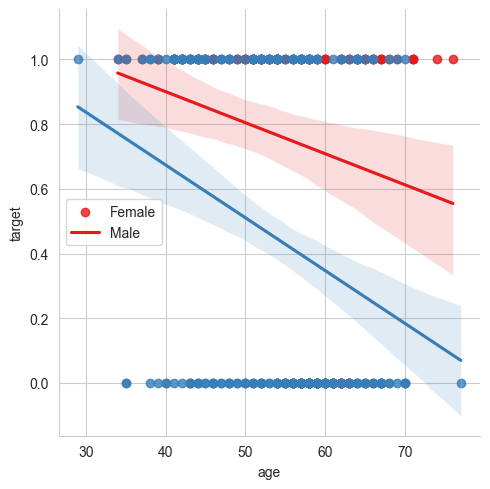

In [23]:
sns.lmplot(x='age',y='target',data=heart_dataset, hue='sex', legend=False,  palette='Set1')
plt.legend(['Female', 'Male'])
plt.show()

Kita dapat melihat bahwa perempuan cenderung memiliki lebih banyak penyakit jantung, tetapi ketika perempuan semakin bertambah tua, peluangnya semakin sedikit untuk memiliki penyakit jantung.

<b>B. Chest pain type</b>

<Figure size 1000x800 with 0 Axes>

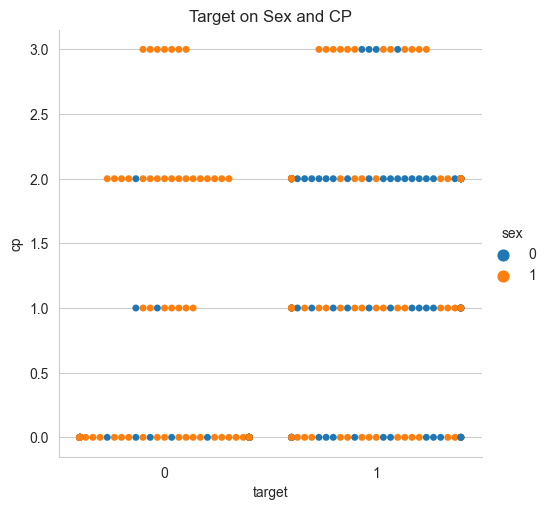

In [24]:
plt.figure(figsize=(10,8))
sns.catplot(data=heart_dataset, x='target', y='cp', hue='sex', kind='swarm')
plt.title('Target on Sex and CP')
plt.show()

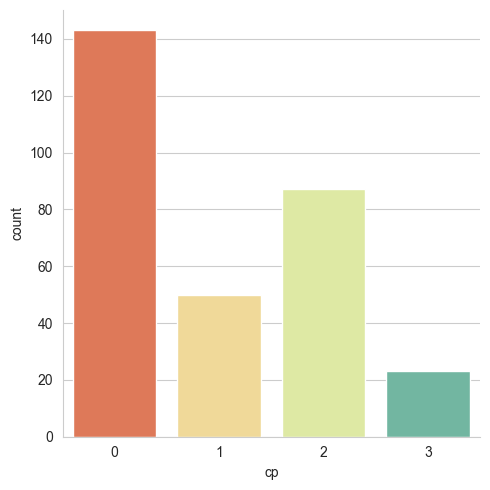

In [25]:
sns.catplot(x='cp', data=heart_dataset, kind="count", palette='Spectral')
plt.show()

Kita dapat melihat nyeri dada tipe 0 lebih umum di antara orang-orang.

[Text(0, 0, 'pain type 0'),
 Text(1, 0, 'pain type 1'),
 Text(2, 0, 'pain type 2'),
 Text(3, 0, 'pain type 3')]

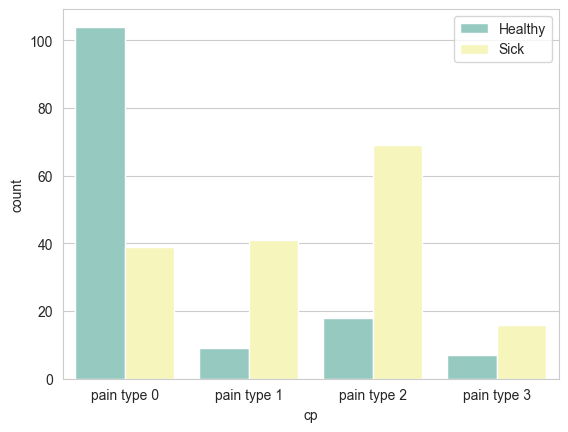

In [26]:
fig = sns.countplot(x = 'cp', data=heart_dataset, hue = 'target', palette='Set3')
plt.legend(['Healthy', 'Sick'])
fig.set_xticklabels(labels=['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3'])

Tampaknya orang dengan nyeri dada tipe 0 cenderung tidak memiliki masalah serius. Nyeri dada tipe 2 tampaknya lebih serius.

<b>C. Resting blood pressure</b>

"trestbps" adalah tekanan darah saat istirahat (dalam mm Hg). Tekanan darah istirahat normal, pada orang dewasa adalah sekitar 120 milimeter air raksa.

[Text(0.5, 0, 'resting blood pressure')]

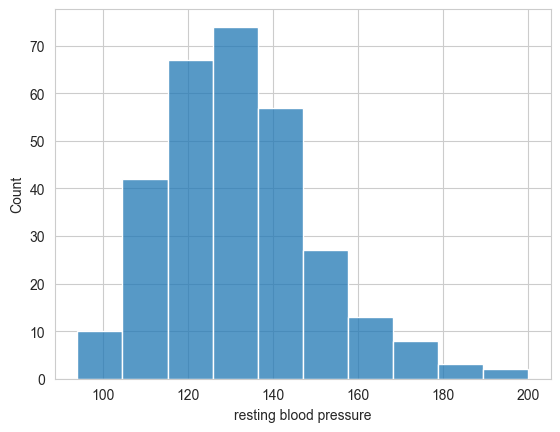

In [27]:
fig = sns.histplot(heart_dataset['trestbps'], bins= 10)
fig.set(xlabel = 'resting blood pressure')

Tekanan darah orang-orang dalam penelitian ini adalah antara 120-130.

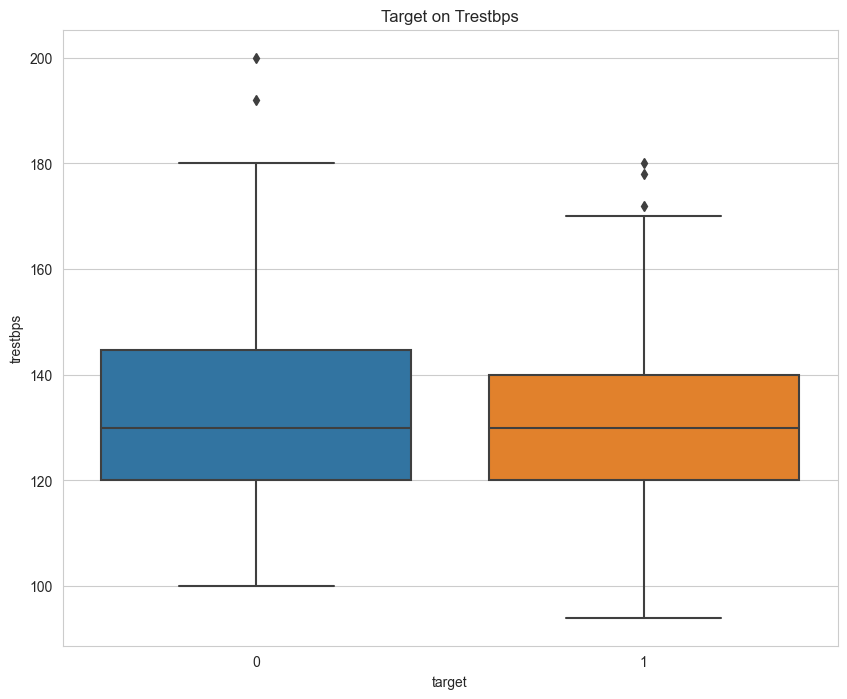

In [28]:
plt.figure(figsize=(10,8))
sns.boxplot(data=heart_dataset, x='target', y='trestbps')
plt.title('Target on Trestbps')
plt.show()

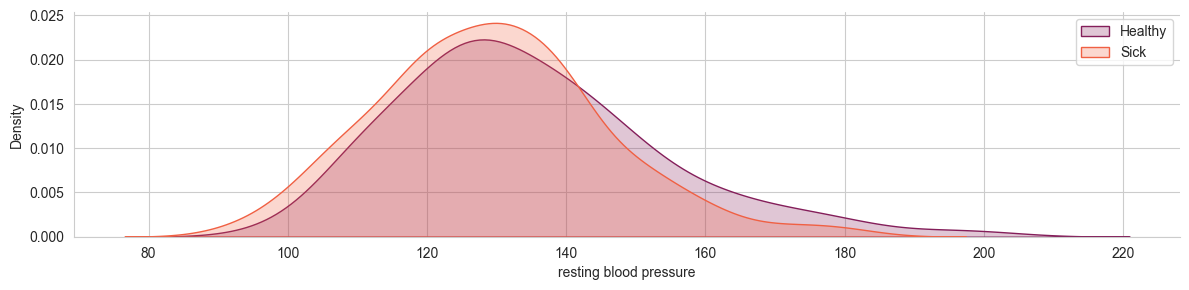

In [29]:
fig = sns.FacetGrid(heart_dataset, hue="target",aspect=4, palette='rocket')
fig.map(sns.kdeplot,'trestbps',shade= True)
plt.legend(labels=['Healthy' , 'Sick'])
fig.set(xlabel = 'resting blood pressure')

Tampaknya orang dengan masalah jantung umumnya memiliki tekanan darah yang sedikit lebih rendah daripada orang normal.

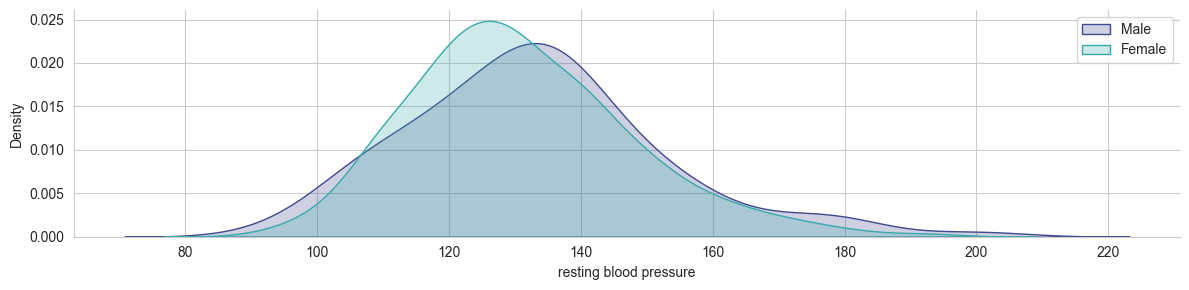

In [30]:
fig = sns.FacetGrid(heart_dataset, hue="sex",aspect=4, palette='mako')
fig.map(sns.kdeplot,'trestbps',shade= True)
plt.legend(labels=['Male' , 'Female'])
fig.set(xlabel = 'resting blood pressure')

Wanita memiliki tekanan darah istirahat yang lebih rendah dibandingkan dengan pria. Untuk wanita sekitar 120 sedangkan untuk pria kurang dari 140.

<b>D. Serum cholestoral</b>

"chol" atau kolesterol serum dalam mg/dl. Kolesterol serum yang sehat adalah kurang dari 200 mg/dL.

[Text(0.5, 0, 'serum cholestrol')]

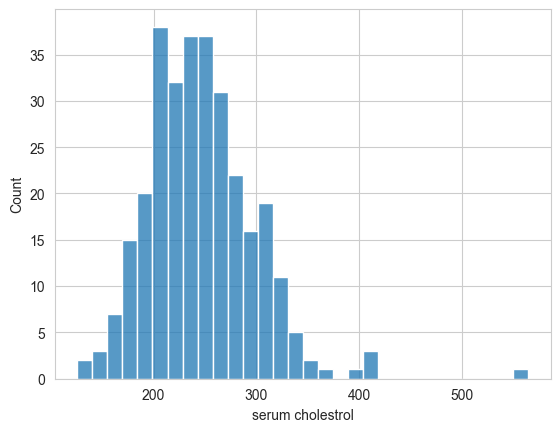

In [31]:
fig = sns.histplot(heart_dataset['chol'], bins= 30)
fig.set(xlabel = 'serum cholestrol')

Seperti yang dituliskan dalam teori, kolesterol serum dalam penelitian ini berkisar antara 200-300. 

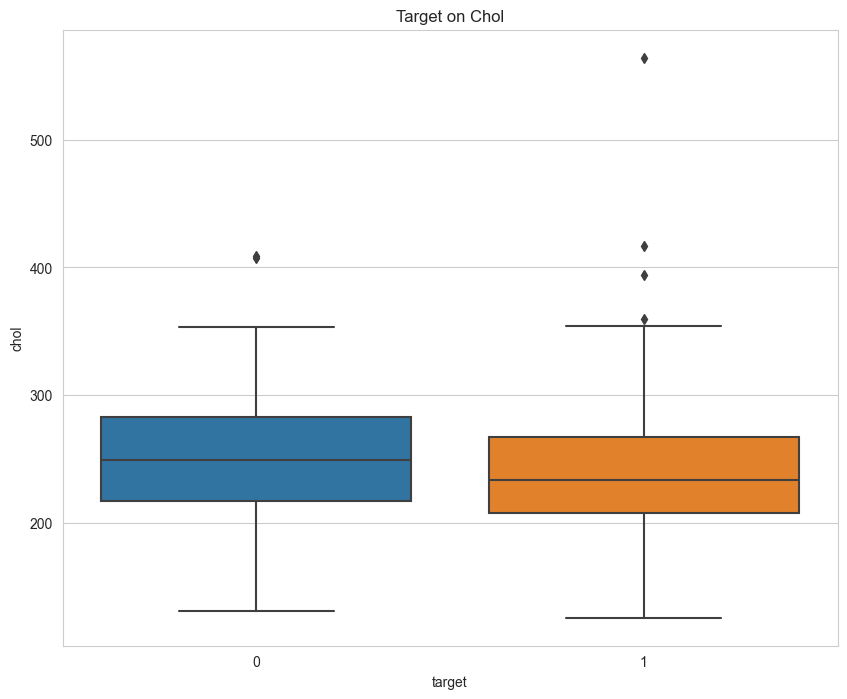

In [32]:
plt.figure(figsize=(10,8))
sns.boxplot(data=heart_dataset, x='target', y='chol')
plt.title('Target on Chol')
plt.show()

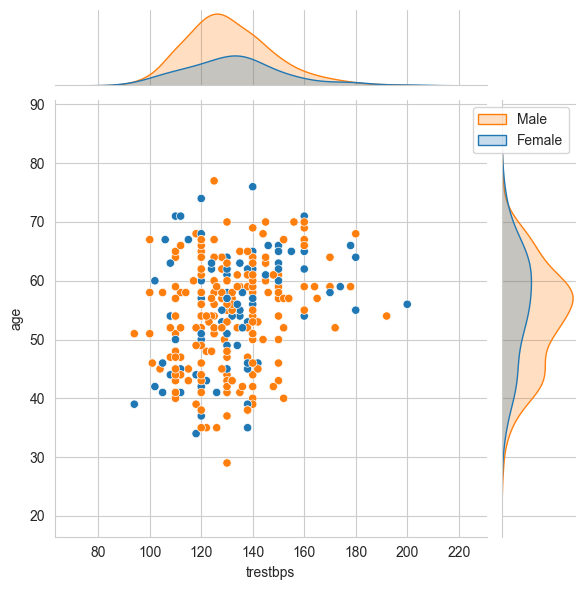

In [33]:
sns.jointplot(data=heart_dataset, x='trestbps', y='age', hue='sex', kind='scatter', legend=False)
plt.legend(labels=['Male' , 'Female'])

Baik pada wanita maupun pria, kita dapat melihat bahwa tekanan darah meningkat seiring bertambahnya usia.

<b>E. Fasting blood sugar</b>

"fbs" atau gula darah puasa harus kurang dari 120 mg/dl. 0: false; 1: true

[Text(0, 0, 'low blood sugar'), Text(1, 0, 'high blood sugar')]

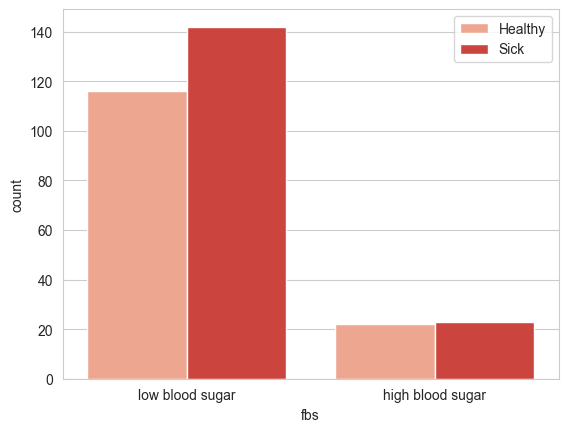

In [34]:
fig = sns.countplot(x = 'fbs', data = heart_dataset, hue = 'target', palette='Reds')
plt.legend(['Healthy', 'Sick'])
fig.set_xticklabels(labels=[ 'low blood sugar','high blood sugar'])

Kita melihat bahwa sebagian besar orang sehat dan sakit memiliki gula darah kurang dari 120. Hanya sedikit orang yang memiliki gula darah lebih tinggi, tetapi kemungkinan besar gula darah bukan alasan mereka sakit.

<Figure size 1000x800 with 0 Axes>

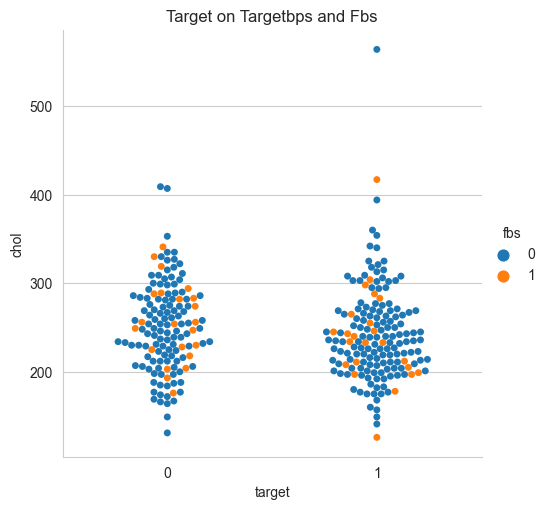

In [35]:
plt.figure(figsize=(10,8))
sns.catplot(data=heart_dataset, x='target', y='chol', hue='fbs', kind='swarm')
plt.title('Target on Targetbps and Fbs')
plt.show()

<b>F. Resting electrocardiographic results</b>

Value 0: normal, Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

[Text(0, 0, 'value 0'), Text(1, 0, 'value 1'), Text(2, 0, 'value 2')]

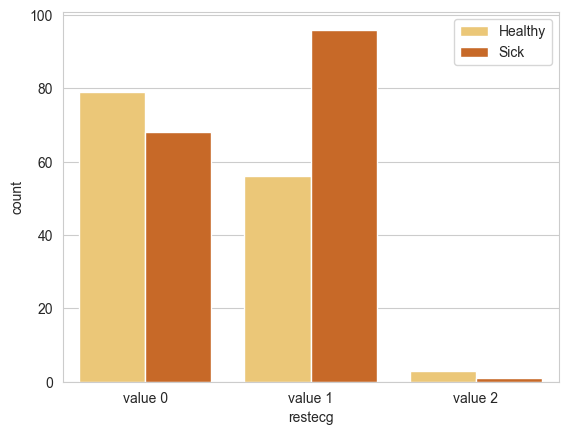

In [36]:
fig = sns.countplot(x = 'restecg', data = heart_dataset, hue = 'target', palette='YlOrBr')
plt.legend(['Healthy', 'Sick'])
fig.set_xticklabels(labels=[ 'value 0','value 1', 'value 2'])

Tampaknya nilai 2 adalah hasil yang langka. Juga, nilai 1 tampaknya lebih berbahaya karena banyak orang sakit memilikinya.

<Figure size 1000x800 with 0 Axes>

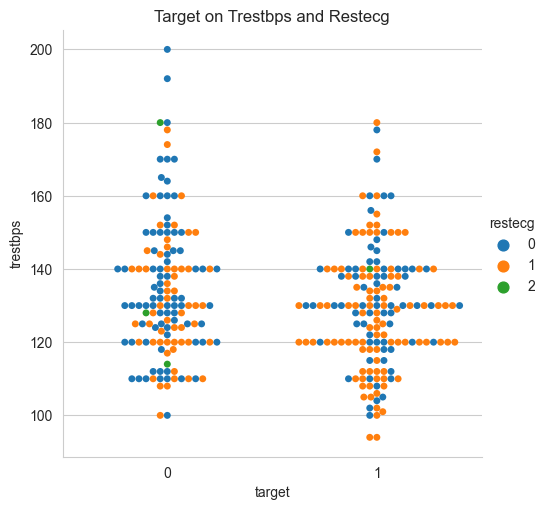

In [37]:
plt.figure(figsize=(10,8))
sns.catplot(data=heart_dataset, x='target', y='trestbps', hue='restecg', kind='swarm')
plt.title('Target on Trestbps and Restecg')
plt.show()

Kita dapat melihat orang-orang yang memiliki tekanan darah diatas 120mmHg sebagian besar juga memiliki nilai 1 restecg, dimana ini tipe yang rawan.

<b>G. Maximum heart rate achieved</b>

[Text(0.5, 0, 'maximum heart rate achieved')]

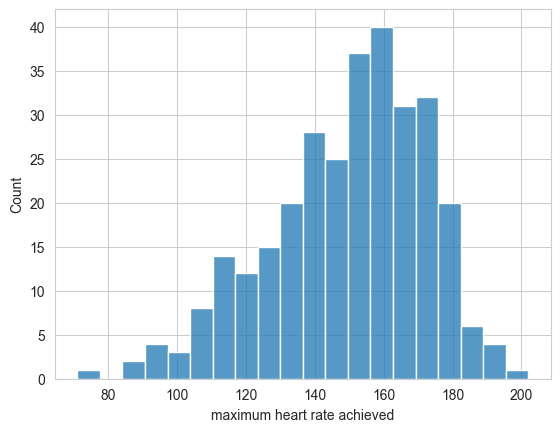

In [38]:
fig = sns.histplot(heart_dataset['thalach'], bins= 20)
fig.set(xlabel = 'maximum heart rate achieved')

Denyut jantung maksimum yang dicapai tampaknya antara 150 - 170.

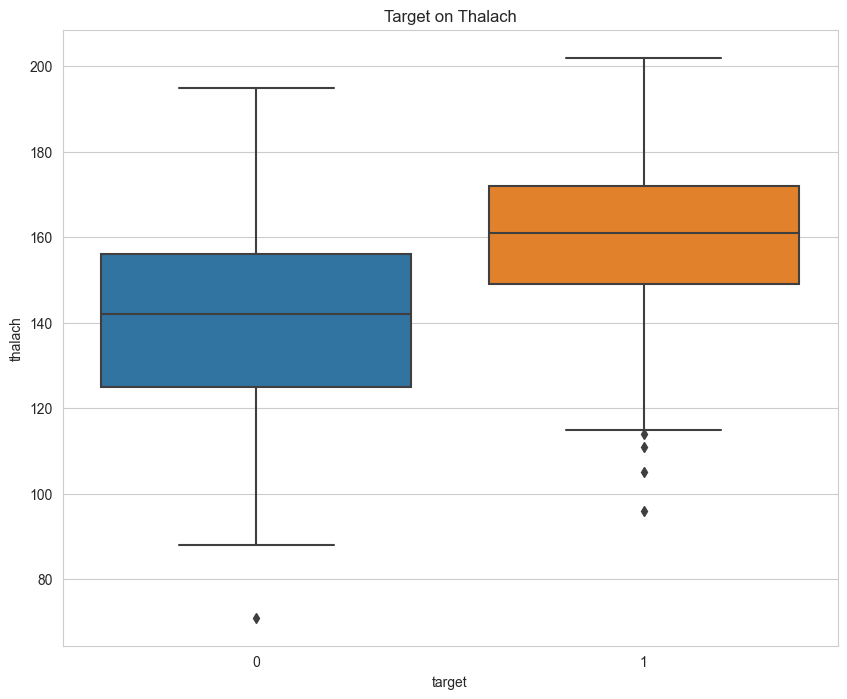

In [39]:
plt.figure(figsize=(10,8))
sns.boxplot(data=heart_dataset, x='target', y='thalach')
plt.title('Target on Thalach')
plt.show()

[Text(0, 0, 'healthy'), Text(1, 0, 'sick')]

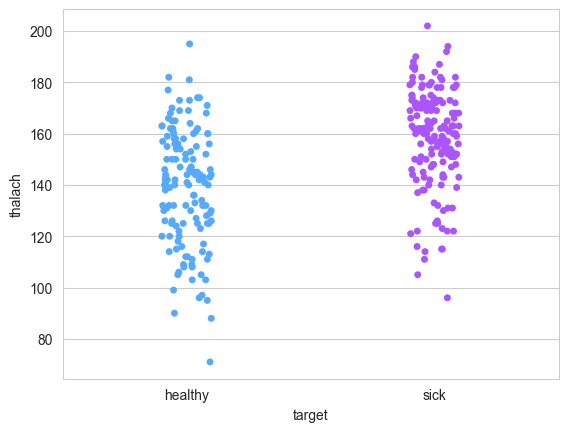

In [40]:
fig = sns.stripplot(data=heart_dataset, x='target', y='thalach', palette='cool')
fig.set_xticklabels(labels=['healthy','sick'])

Orang sakit tampaknya memiliki nilai detak jantung maksimum yang lebih tinggi.

<b>H. Exercise induced angina</b>

"exang" atau angina yang diinduksi olahraga adalah perasaan seperti tekanan di dada, rahang atau lengan. Ini sering dapat terjadi dengan olahraga atau stres.

[Text(0, 0, 'no angina'), Text(1, 0, 'with angina')]

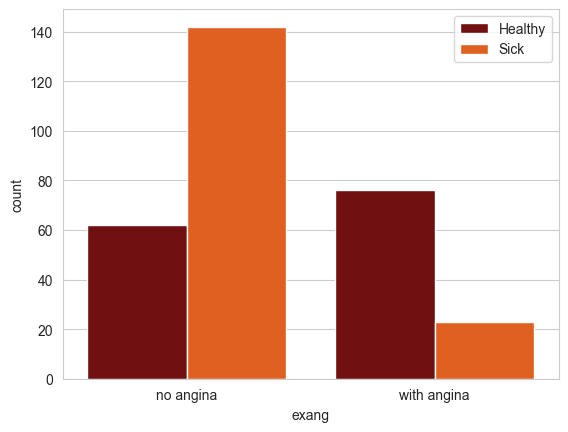

In [41]:
fig = sns.countplot(x = 'exang', data = heart_dataset, hue = 'target', palette='gist_heat')
plt.legend(['Healthy', 'Sick'])
fig.set_xticklabels(labels=['no angina','with angina'])

Kita dapat melihat bahwa banyak orang sehat memiliki angina yang diinduksi olahraga, sementara banyak orang sakit tidak memilikinya. Jadi ini mungkin bukan tanda penyakit jantung.

<Figure size 1000x800 with 0 Axes>

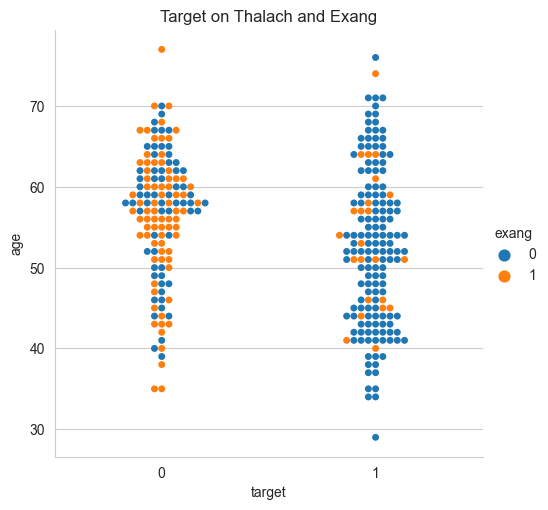

In [42]:
plt.figure(figsize=(10,8))
sns.catplot(data=heart_dataset, x='target', y='age', hue='exang', kind='swarm')
plt.title('Target on Thalach and Exang')
plt.show()

<b>I. Oldpeak (ST depression)</b>

Elektrokardiografi adalah proses menghasilkan elektrokardiogram. Ini adalah grafik tegangan versus waktu aktivitas listrik jantung menggunakan elektroda yang ditempatkan pada kulit. Depresi ST mengacu pada temuan pada elektrokardiogram, di mana jejak di segmen ST secara abnormal rendah di bawah garis dasar.

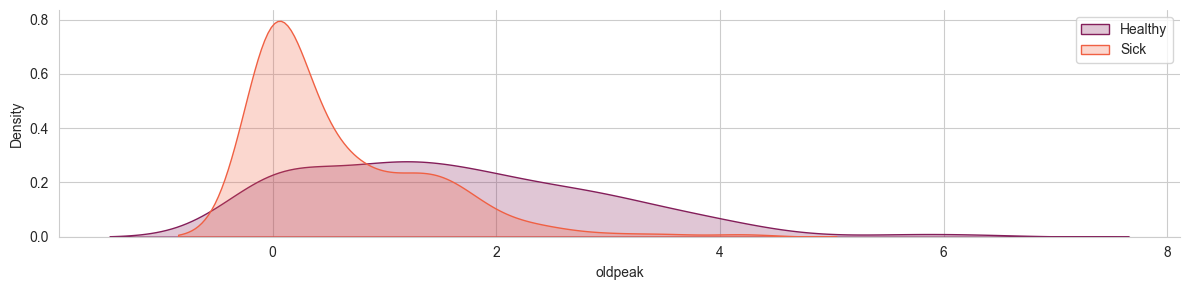

In [43]:
fig = sns.FacetGrid(heart_dataset, hue="target",aspect=4, palette='rocket')
fig.map(sns.kdeplot,'oldpeak',shade= True)
plt.legend(labels=['Healthy' , 'Sick'])

Kita dapat melihat dengan jelas bahwa pada orang sakit kita memiliki peak sekitar 0. Ini bisa menjadi indikator yang baik untuk penyakit jantung ini.

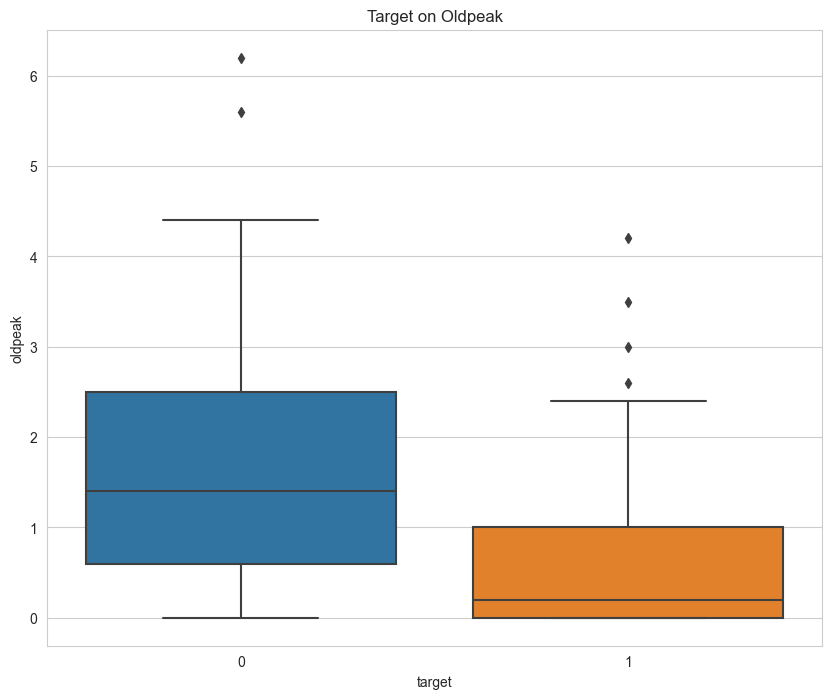

In [44]:
plt.figure(figsize=(10,8))
sns.boxplot(data=heart_dataset, x='target', y='oldpeak')
plt.title('Target on Oldpeak')
plt.show()

<b>J. Slope of the peak exercise ST segment</b>

Value 1: upsloping, Value 2: flat, Value 3: downsloping

[Text(0, 0, 'value 1'), Text(1, 0, 'value 2'), Text(2, 0, 'value 3')]

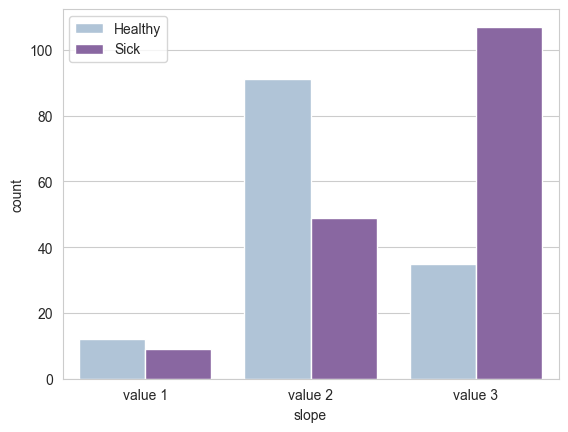

In [45]:
fig = sns.countplot(x = 'slope', data = heart_dataset, hue = 'target', palette='BuPu')
plt.legend(['Healthy', 'Sick'])
fig.set_xticklabels(labels=[ 'value 1','value 2', 'value 3'])

Kita dapat melihat bahwa grafik nilai 1 (upsloping) jarang terjadi. Sementara, banyak orang sehat memiliki nilai 2 (flat) dan banyak orang sakit memiliki nilai 3 (downsloping). Jadi ini harus ditanggapi lebih serius.

<Figure size 1000x800 with 0 Axes>

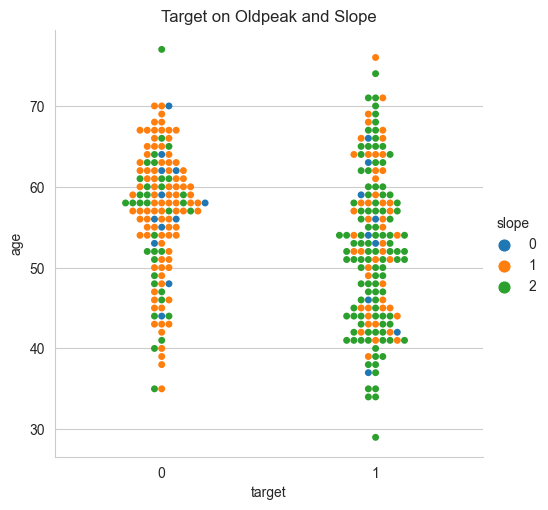

In [46]:
plt.figure(figsize=(10,8))
sns.catplot(data=heart_dataset, x='target', y='age', hue='slope', kind='swarm')
plt.title('Target on Oldpeak and Slope')
plt.show()

<b>K. Number of major vessels colored by flourosopy</b>

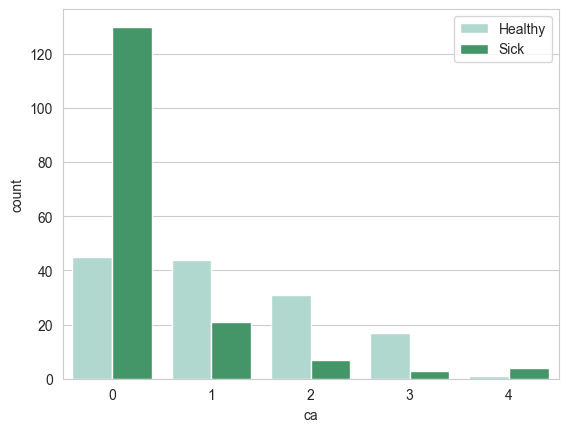

In [47]:
fig = sns.countplot(x = 'ca', data = heart_dataset, hue = 'target', palette='BuGn')
plt.legend(['Healthy', 'Sick'])

Kita dapat melihat bahwa pada orang sakit banyak orang dengan 0 pembuluh darah besar yang diwarnai oleh flourosopy. Jadi ini juga harus diperhitungkan.

<Figure size 1000x800 with 0 Axes>

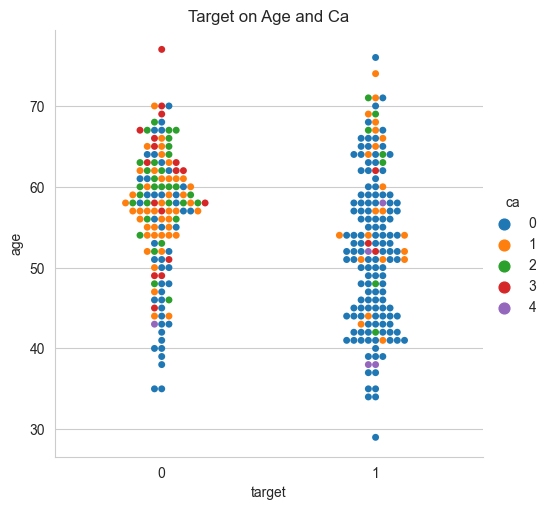

In [48]:
plt.figure(figsize=(10,8))
sns.catplot(data=heart_dataset, x='target', y='age', hue='ca', kind='swarm')
plt.title('Target on Age and Ca')
plt.show()

<b>L. Thalassemia</b>

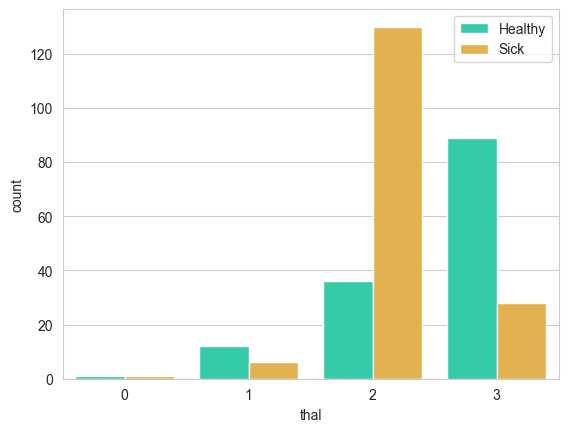

In [49]:
fig = sns.countplot(x = 'thal', data = heart_dataset, hue = 'target', palette='turbo')
plt.legend(['Healthy', 'Sick'])

Kita bisa melihat banyak orang sakit memiliki tipe 2 Thalassemia.

<b>Seperate Features and Labels</b>

In [50]:
X = heart_dataset.drop(columns='target', axis=1)
y = heart_dataset['target']

In [51]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [52]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


<b>Train Test Split</b>

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [54]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


<b>Train the Model</b>

In [55]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [56]:
model.fit(X_train, y_train)

LogisticRegression()

<b>Model Evaluation</b>

In [57]:
from sklearn.metrics import accuracy_score
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [58]:
print("Accuracy on training data : ", training_data_accuracy)

Accuracy on training data :  0.8512396694214877


In [59]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [60]:
print("Accuracy on test data : ", test_data_accuracy)

Accuracy on test data :  0.819672131147541


<b>Making a Predictive System</b>

In [61]:
input_data = (41,0,1,130,204,0,0,172,0,1.4,2,0,2)

#Change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print("The person does not have a heart disease")
else:
    print("The person has a heart disease")

[1]
The person has a heart disease


In [62]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

#Change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print("The person does not have a heart disease")
else:
    print("The person has a heart disease")

[0]
The person does not have a heart disease


In [63]:
import pickle

In [64]:
#filename = "heart_disease_model.sav"
#pickle.dump(model, open(filename, 'wb'))